**Clustering Based Methods - Outlier Detection**

**1.DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm that can also be used for outlier detection. 

Unlike other clustering algorithms like k-means, which require the number of clusters to be specified, DBSCAN detects clusters of varying shapes based on the density of data points. 

Points that do not belong to any cluster are labeled as outliers (also known as noise).

**Key Concepts in DBSCAN:**

**Core Points:** A point is a core point if it has at least a minimum number of neighbors (min_samples) within a specified radius (eps).

**Border Points:** A point is a border point if it is not a core point but lies within the neighborhood of a core point.

**Noise/Outliers:** A point is considered an outlier if it is neither a core point nor a border point. These points do not belong to any cluster and are labeled as noise.

**Parameters:**

**eps (epsilon):** The maximum distance between two points for them to be considered neighbors.

**min_samples:** The minimum number of points required to form a dense region (a cluster).

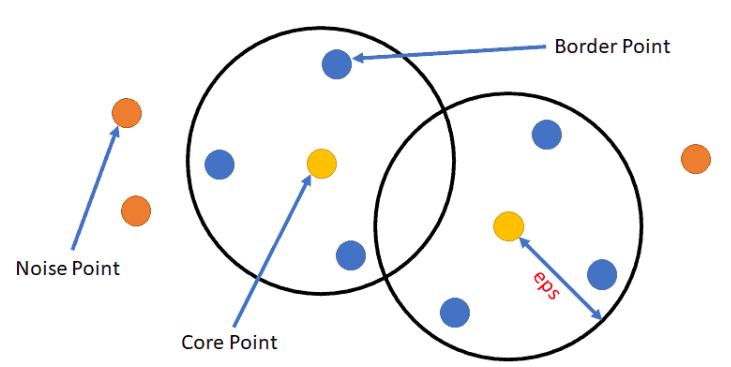

**Steps for Outlier Detection Using DBSCAN:**
1. Select the eps and min_samples parameters based on the dataset.

2. Fit DBSCAN to the data: The algorithm will automatically label points as part of a cluster or as noise.

3. Outliers: Points labeled as -1 by DBSCAN are considered outliers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [6]:
# Generate synthetic data
np.random.seed(42)

# Cluster 1: 100 points around (1,1)
cluster_1 = np.random.randn(100, 2) + [1, 1]

# Cluster 2: 100 points around (5,5)
cluster_2 = np.random.randn(100, 2) + [5, 5]

# Outliers: 10 random points far from clusters
outliers = np.random.uniform(low=-10, high=10, size=(10, 2))

# Combine all data points
X = np.vstack([cluster_1, cluster_2, outliers])


In [8]:
# Apply DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)


In [9]:
core_points = X[labels != -1]  # Points that are either core or border
outliers = X[labels == -1]     # Points labeled as -1 (outliers)


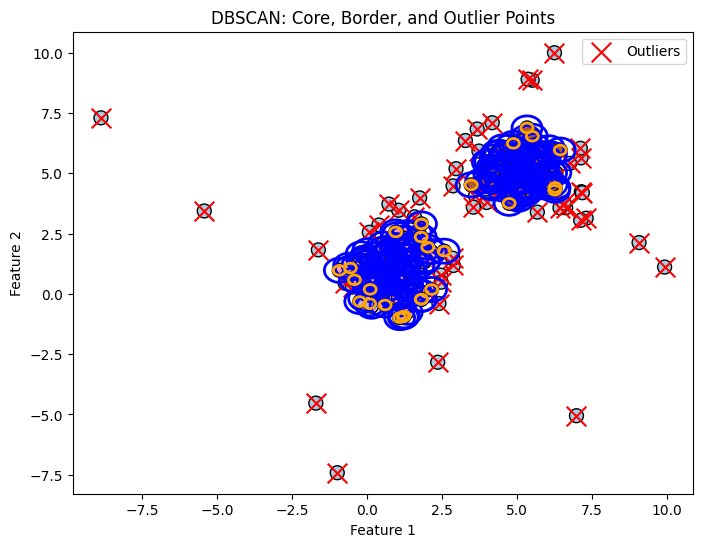

In [11]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot core and border points (colored by cluster label)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Paired', marker='o', edgecolor='k', s=100)

# Highlight outliers in red (with 'x' markers)
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', marker='x', s=200)

# Highlight core points with larger circles (radius = 0.5)
for point in core_points:
    plt.gca().add_artist(plt.Circle((point[0], point[1]), 0.5, color='blue', fill=False, linestyle='-', linewidth=2))

# Highlight border points with smaller circles (radius = 0.2)
for point in core_points:
    if np.count_nonzero(np.linalg.norm(X - point, axis=1) < 0.5) < 5:
        plt.gca().add_artist(plt.Circle((point[0], point[1]), 0.2, color='orange', fill=False, linestyle='-', linewidth=2))

# Labels and title
plt.title("DBSCAN: Core, Border, and Outlier Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show plot
plt.show()


DBSCAN is an excellent algorithm for density-based clustering and outlier detection.

Points that do not meet the density criteria (i.e., points that are not part of any dense cluster) are labeled as outliers.

By adjusting the eps and min_samples parameters, you can control the sensitivity of DBSCAN to outliers and clusters.

This method is especially useful when the data has irregular shapes and varying density clusters, which traditional clustering algorithms like k-means cannot handle well.

DBSCAN's ability to detect outliers is a significant advantage for many real-world datasets.

**2.K-Means Clustering**

K-Means Clustering is a popular algorithm used for clustering data into distinct groups based on similarity. 

While it’s not specifically designed for outlier detection, outliers can still be detected by observing how far individual data points are from the centroids of the clusters.


Outlier Detection in K-Means
In K-Means clustering, outliers are typically points that:

1. Do not belong to any dense cluster (they might be far away from the cluster centroids).

2. Have a significantly higher distance to the centroid of their assigned cluster compared to other points in that cluster.

**Key Steps:**

1. Perform K-Means clustering on your data.

2. Calculate the Euclidean distance of each data point from the centroid of its assigned cluster.
Identify outliers based on their distance from the centroid (those that have a much larger distance than most of the points in the cluster).

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [13]:
# Generate synthetic data with 3 clusters
np.random.seed(42)

# Create 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Add outliers (points far from the clusters)
outliers = np.array([[10, 10], [12, 12], [15, 15], [-10, -10], [-12, -12]])
X_with_outliers = np.vstack([X, outliers])


In [14]:
# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_with_outliers)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centroids
centroids = kmeans.cluster_centers_


In [15]:
# Calculate the Euclidean distance from each point to its centroid
distances = np.linalg.norm(X_with_outliers - centroids[labels], axis=1)


In [16]:
# Calculate the mean and standard deviation of the distances
mean_distance = np.mean(distances)
std_distance = np.std(distances)

# Define outliers as points with distances > mean + 2 * std
outlier_threshold = mean_distance + 2 * std_distance
outliers = X_with_outliers[distances > outlier_threshold]


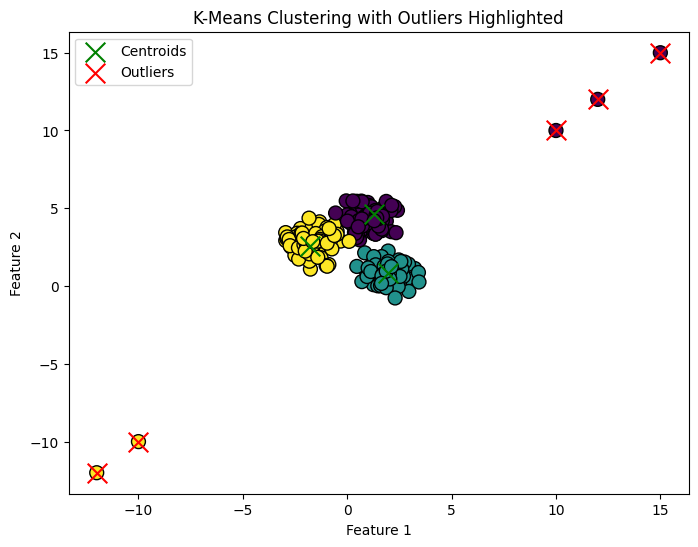

In [19]:
# Plotting the data points
plt.figure(figsize=(8, 6))

# Plot all points, color-coded by cluster
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)

# Plot the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', marker='x', s=200, label='Centroids')

# Highlight the outliers in red 'x' markers
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Outliers', marker='x', s=200)

# Add title and labels
plt.title("K-Means Clustering with Outliers Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show plot
plt.show()


K-Means clustering can be effectively used to detect outliers by:

1. Clustering the data.
2. Measuring the distance of each data point from its assigned centroid.
3. Identifying points that are far away from the centroids (based on a distance threshold) as outliers.

This method is simple and works well when the clusters are compact and spherical. 
However, it may not perform well with non-spherical clusters or highly skewed data, as K-Means assumes that all clusters are of similar shapes and densities.